Testing Sentence Similarity

In [1]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from nltk import tokenize


### Download Universal Sentence Encoder 

In [2]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [3]:
"""
3 documents are all 10Qs from Apple 
"""

sentences = []
sent_count = []
documents = ["0.txt", "1.txt", "2.txt"]
for doc in documents:
    doc_text = open(f"../resources/filtered/{doc}").read()
    doc_sent = tokenize.sent_tokenize(doc_text)[:740]
    sentences += doc_sent
    sent_count.append(len(sentences))
non_empty = [sentence for sentence in sentences if len(sentence) > 0]
ax_labels = ["Q1", "Q2", "Q3"]
title = "Pairwise Sentence Similarity Heatmap of 3 2018 Apple 10 Qs"

In [4]:
"""
3 documents are 10Qs from Apple, HP, and Microsoft
"""

sentences = []
sent_count = []
documents = ["0.txt", "102.txt", "144.txt"]
for doc in documents:
    doc_text = open(f"../resources/filtered/{doc}").read()
    doc_sent = tokenize.sent_tokenize(doc_text)[:740]
    sentences += doc_sent
    sent_count.append(len(sentences))
non_empty = [sentence for sentence in sentences if len(sentence) > 0]
title = "Pairwise Sentence Similarity Heatmap of Apple, HP, and Oracle 10Qs"
ax_labels = ["Apple", "HP", "Oracle"]

In [5]:
"""
3 documents: first is an apple 10Q, the other are two non-10Q financial documents 

"""
sentences = []
sent_count = []
doc_text = open(f"../resources/filtered/0.txt").read()
doc_sent = tokenize.sent_tokenize(doc_text)[:740]
sentences += doc_sent
sent_count.append(len(sentences))
call_text = open(f"../resources/call.txt").read()
call_sents = tokenize.sent_tokenize(call_text)
sentences += call_sents[:400]
sent_count.append(len(sentences))
sentences += call_sents[400:800]
sent_count.append(len(sentences))
non_empty = [sentence for sentence in sentences if len(sentence) > 0]
title = "Pairwise Sentence Similarity Heatmap of Apple 10Q and 2 Non-10Q Documents"
ax_labels = "Apple", "Doc B", "Doc C"

In [6]:
"""
3 documents are all 10Qs from Oracle
"""

sentences = []
sent_count = []
documents = ["142.txt", "143.txt", "144.txt"]
for doc in documents:
    doc_text = open(f"../resources/filtered/{doc}").read()
    doc_sent = tokenize.sent_tokenize(doc_text)[:740]
    sentences += doc_sent
    sent_count.append(len(sentences))
non_empty = [sentence for sentence in sentences if len(sentence) > 0]
title = "Pairwise Sentence Similarity Heatmap of 3 2018 Oracle 10 Qs"
ax_labels = ["Q1", "Q2", "Q3"]

In [7]:
logging.set_verbosity(logging.ERROR)

vectors = embed(non_empty)

In [8]:
from sklearn import metrics
num_sent = np.shape(vectors)[0]
cosine = metrics.pairwise.cosine_similarity(vectors)
## kill off the diagonal
np.fill_diagonal(cosine, 0.0)
# maxes = np.amax(cosine, 1)
maxes = np.amax(cosine, 1)
argmaxes = np.argmax(cosine, 1)
#print(maxes)



# Exploring Cosine Similarity

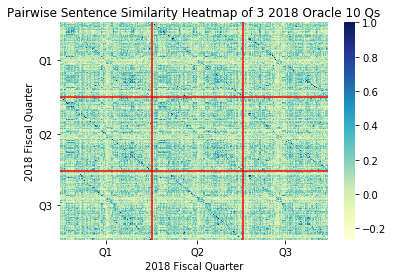

In [9]:
# %matplotlib ipympl

sns.heatmap(cosine,cmap="YlGnBu")
plt.axhline(sent_count[0],color='red')
plt.axhline(sent_count[1],color='red')
plt.axvline(sent_count[0],color='red')
plt.axvline(sent_count[1], color='red')

plt.title(title)
plt.xlabel("2018 Fiscal Quarter")
plt.ylabel("2018 Fiscal Quarter")

plt.xticks([sent_count[0]/2,sent_count[1] - (sent_count[1]-sent_count[0])/2,\
            sent_count[2]- (sent_count[2]- sent_count[1])/2],ax_labels,\
          rotation="horizontal")
plt.yticks([sent_count[0]/2,sent_count[1] - (sent_count[1]-sent_count[0])/2,\
            sent_count[2]- (sent_count[2]- sent_count[1])/2],ax_labels,\
          rotation="horizontal")
plt.show()


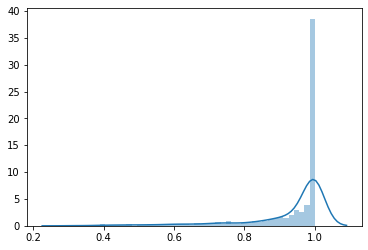

In [10]:
## plot histogram 
idcs = range(num_sent)
sns.distplot(maxes)
# seaborn.scatterplot(list(range(num_sent)), maxes)
plt.show()

In [11]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
@interact
def show_sent_below_thresh(thr=(min(maxes),max(maxes),.01),show_plot=True):
    below_thresh = np.where(maxes < thr)
    if show_plot == True:
        sns.distplot(maxes)
        plt.axvline(thr,c="red")

        plt.title("Histogram of max sentence correllations")
        plt.xlabel("Cosine Similarity")
        plt.ylabel("Frequency (%)")
        plt.show()
    # print(below_thresh)
    print(f"First 20 sentences with max cosine similarity below {thr:.2f}:")
    counter = 0
    for low in below_thresh[0][:20]:
        if len(sentences[low])>1:
            counter += 1
            print(f"Sentence {counter}.", sentences[low])
            print(f"Most Similar Sentence:", sentences[argmaxes[low]])
            print()
    return (below_thresh[0])



interactive(children=(FloatSlider(value=0.315859854221344, description='thr', max=1.0000004768371582, min=0.31…